# **Métodos de Clustering**

## 1. Imports

In [39]:
!pip install kneed numpy matplotlib scikit-learn seaborn pandas folium

In [40]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [41]:
warnings.filterwarnings("ignore")

## 2. Semilla

In [42]:
np.random.seed(42) # para reproducibilidad

## 3. Análisis y preprocesado del dataset

### Análisis dataset

In [43]:
df = pd.read_csv('marketing_campaign.csv', sep='\t') # cargar dataset

**Personas**  

- **`ID`**: Identificador único del cliente  
- **`Year_Birth`**: Año de nacimiento del cliente  
- **`Education`**: Nivel educativo del cliente  
- **`Marital_Status`**: Estado civil del cliente  
- **`Income`**: Ingreso anual del hogar del cliente  
- **`Kidhome`**: Número de niños en el hogar del cliente  
- **`Teenhome`**: Número de adolescentes en el hogar del cliente  
- **`Dt_Customer`**: Fecha de registro del cliente en la empresa  
- **`Recency`**: Número de días desde la última compra del cliente  
- **`Complain`**: 1 si el cliente presentó una queja en los últimos 2 años, 0 en caso contrario  


---

**Productos**  

- **`MntWines`**: Cantidad gastada en vino en los últimos 2 años  
- **`MntFruits`**: Cantidad gastada en frutas en los últimos 2 años  
- **`MntMeatProducts`**: Cantidad gastada en carne en los últimos 2 años  
- **`MntFishProducts`**: Cantidad gastada en pescado en los últimos 2 años  
- **`MntSweetProducts`**: Cantidad gastada en dulces en los últimos 2 años  
- **`MntGoldProds`**: Cantidad gastada en oro en los últimos 2 años  


---

**Promociones**  

- **`NumDealsPurchases`**: Número de compras realizadas con descuento  
- **`AcceptedCmp1`**: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario  
- **`AcceptedCmp2`**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario  
- **`AcceptedCmp3`**: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario  
- **`AcceptedCmp4`**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario  
- **`AcceptedCmp5`**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario  
- **`Response`**: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario  


---

**Lugares de compra**  

- **`NumWebPurchases`**: Número de compras realizadas a través del sitio web de la empresa  
- **`NumCatalogPurchases`**: Número de compras realizadas mediante catálogo  
- **`NumStorePurchases`**: Número de compras realizadas directamente en tiendas  
- **`NumWebVisitsMonth`**: Número de visitas al sitio web de la empresa en el último mes  


In [44]:
df.head() # primeras filas dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [45]:
df.shape # tamaño dataset

(2240, 29)

In [46]:
df.dtypes # tipos de datos en el dataset

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [47]:
df.isnull().sum() # comprobar si hay valores nulos en el dataset

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [48]:
df = df.dropna() # eliminar filas con datos nulos (solo son 24 de 2240 instancias)

In [49]:
df.isnull().sum() # comprobamos de nuevo si hay nulos

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

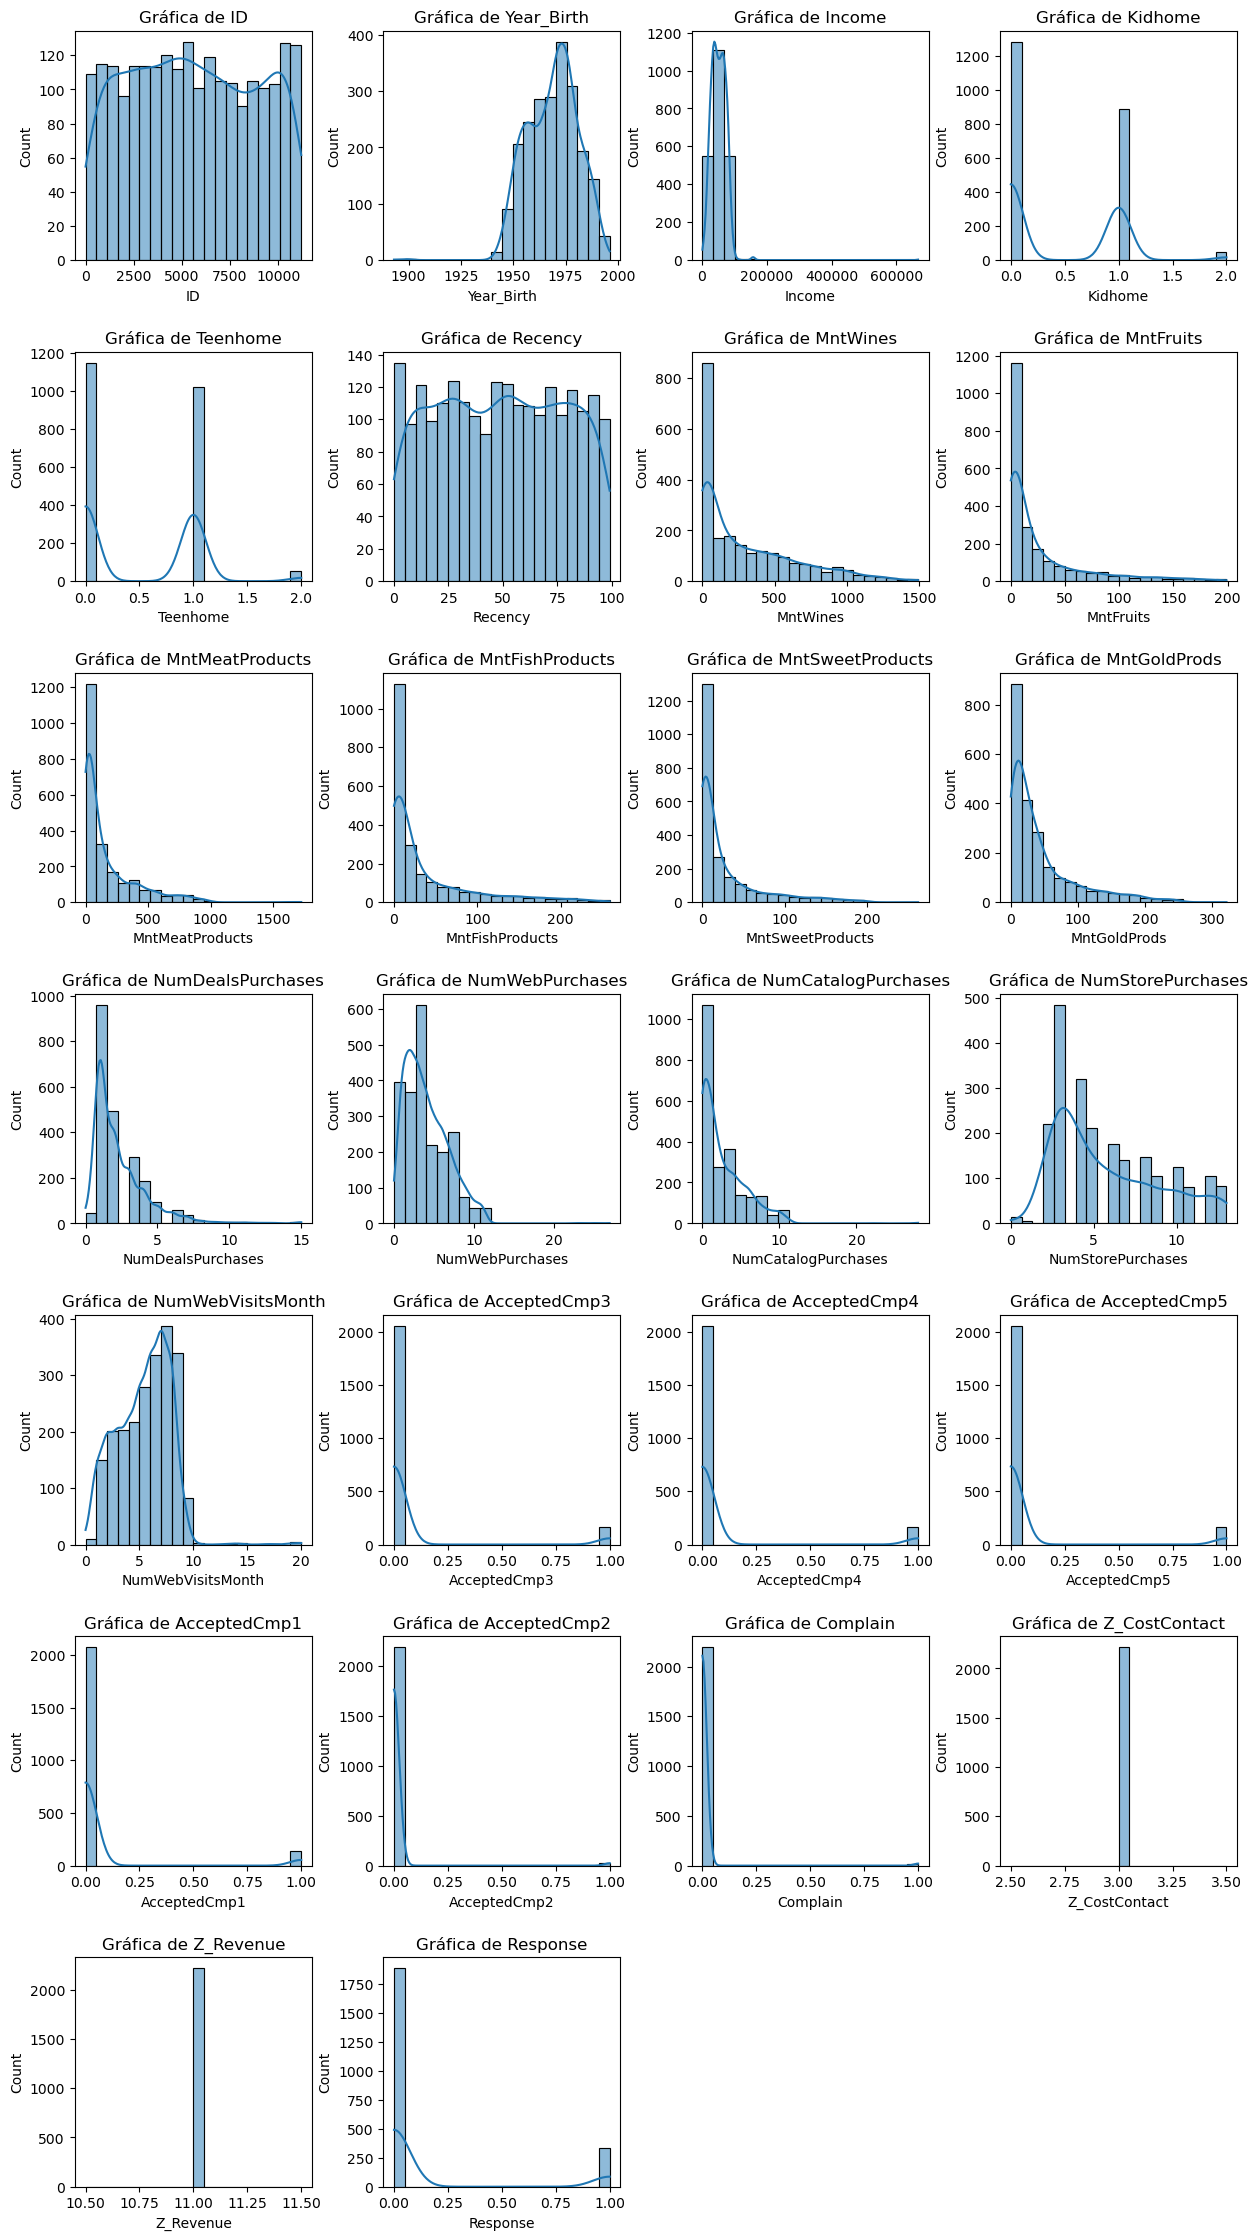

In [50]:
# Columnas y variables (numéricas)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars = len(num_cols)

# Cantidad de filas y columnas
cols = 4  # Máximo de columnas por fila (ajustable)
filas = (num_vars // cols) + (num_vars % cols > 0)  # Número de filas necesarias

# Cuadrícula de histogramas
fig, axes = plt.subplots(filas, cols, figsize=(15, 4 * filas))  # Tamaño dinámico
axes = axes.flatten()  # Para indexar correctamente

# Histogramas cuadrícula
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i]) # histograma de cada vble
    axes[i].set_title(f'Gráfica de {col}') 

for j in range(i + 1, len(axes)): # ejes no utilizados
    fig.delaxes(axes[j]) # eliminar ejes no utilizados (no mostrar histograma)

plt.subplots_adjust(hspace=0.4, wspace=0.3) # ajustar

plt.show() # mostrar

## 4. Técnicas de clustering

### **K-Means**

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[num_cols]) # normalizar datos

In [52]:
# Muestra de datos normalizados
df_normalized = pd.DataFrame(X, columns=num_cols) # de vuelta a df
df_normalized.head() # primeras filas dataset normalizado

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.493611,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.194263,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.370029,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.552408,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.475739,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 

### **DBSCAN**

### **GaussianMixtures**